# Task
Perform a comprehensive analysis of trader performance and behavior using the provided `historical_data.csv` and `fear_greed_index.csv`. Your analysis should investigate the impact of market sentiment (Fear vs. Greed) on key trader metrics, identify distinct trader segments, generate actionable insights supported by visualizations, and propose new trading strategies based on your findings.

## Load and Inspect Data

### Subtask:
Load both `historical_data.csv` and `fear_greed_index.csv` into pandas DataFrames. Inspect their initial structure, including the number of rows/columns, check for missing values, and identify any duplicate entries for both datasets.


**Reasoning**:
Load the two CSV files into pandas DataFrames and perform initial inspections as requested by displaying the first 5 rows, printing the concise summary (info), and identifying duplicate entries for both datasets.



In [9]:
import pandas as pd

# Load historical_data.csv
historical_data = pd.read_csv('/content/historical_data.csv')
print("Historical Data - First 5 rows:")
print(historical_data.head())
print("\nHistorical Data - Info:")
historical_data.info()
print(f"\nHistorical Data - Number of duplicate rows: {historical_data.duplicated().sum()}")

print("\n" + "-"*50 + "\n")

# Load fear_greed_index.csv
fear_greed_index = pd.read_csv('/content/fear_greed_index.csv')
print("Fear & Greed Index Data - First 5 rows:")
print(fear_greed_index.head())
print("\nFear & Greed Index Data - Info:")
fear_greed_index.info()
print(f"\nFear & Greed Index Data - Number of duplicate rows: {fear_greed_index.duplicated().sum()}")

Historical Data - First 5 rows:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Ord

## Prepare and Align Datasets

### Subtask:
Convert relevant timestamp columns in both datasets to datetime objects. Align the two datasets by date, ensuring daily granularity, to facilitate merged analysis.


**Reasoning**:
The subtask requires converting timestamp columns to datetime objects, extracting dates, and then merging the two dataframes. I will perform these operations in a single code block to ensure data consistency and efficiency.



In [11]:
import pandas as pd
import numpy as np

# 1. Convert 'Timestamp IST' in historical_data to datetime objects
historical_data['Timestamp IST'] = pd.to_datetime(historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M')

# 2. Extract only the date part from 'Timestamp IST' into a new 'Date' column
historical_data['Date'] = historical_data['Timestamp IST'].dt.date
# Ensure 'Date' column in historical_data is also datetime64[ns] for merging
historical_data['Date'] = pd.to_datetime(historical_data['Date'])

# 3. Convert 'date' column in fear_greed_index to datetime objects
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'])

# 4. Merge the two DataFrames
# We convert 'Date' column in historical_data to datetime to match the type of 'date' in fear_greed_index for merging
merged_data = pd.merge(historical_data, fear_greed_index, left_on='Date', right_on='date', how='left')

print("Merged Data - First 5 rows:")
print(merged_data.head())
print("\nMerged Data - Info:")
merged_data.info()

# Display unique dates in historical_data to understand granularity before and after merge
print(f"\nUnique dates in historical_data: {historical_data['Date'].nunique()}")
print(f"Unique dates in fear_greed_index: {fear_greed_index['date'].nunique()}")
print(f"Unique dates in merged_data: {merged_data['Date'].nunique()}")

Merged Data - First 5 rows:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed       Fee      Trade ID

**Reasoning**:
The merge operation failed because the 'Date' column in `historical_data` was of type 'object' (containing datetime.date objects) while the 'date' column in `fear_greed_index` was `datetime64[ns]`. To resolve this, I will ensure both columns are explicitly converted to `datetime64[ns]` before merging.



In [12]:
import numpy as np

# 1. Convert 'Timestamp IST' in historical_data to datetime objects
historical_data['Timestamp IST'] = pd.to_datetime(historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M')

# 2. Extract only the date part from 'Timestamp IST' into a new 'Date' column
historical_data['Date'] = historical_data['Timestamp IST'].dt.date
# Ensure 'Date' column in historical_data is also datetime64[ns] for merging
historical_data['Date'] = pd.to_datetime(historical_data['Date'])

# 3. Convert 'date' column in fear_greed_index to datetime objects
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'])

# 4. Merge the two DataFrames
merged_data = pd.merge(historical_data, fear_greed_index, left_on='Date', right_on='date', how='left')

print("Merged Data - First 5 rows:")
print(merged_data.head())
print("\nMerged Data - Info:")
merged_data.info()

# Display unique dates in historical_data to understand granularity before and after merge
print(f"\nUnique dates in historical_data: {historical_data['Date'].nunique()}")
print(f"Unique dates in fear_greed_index: {fear_greed_index['date'].nunique()}")
print(f"Unique dates in merged_data: {merged_data['Date'].nunique()}")

Merged Data - First 5 rows:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed       Fee      Trade ID

## Feature Engineering: Key Metrics

### Subtask:
Calculate key trading metrics for each trader on a daily basis. This includes daily PnL per trader, win rate, average trade size, number of trades per day, and long/short ratio. These metrics will be essential for subsequent analysis.


**Reasoning**:
The subtask requires calculating several daily trading metrics. I will group the `merged_data` by 'Account' and 'Date' and then apply various aggregation functions to compute daily PnL, number of trades, win count, average trade size, buy count, and sell count. After aggregation, I will calculate the win rate and long/short ratio, handling potential division by zero cases.



In [13]:
daily_trader_metrics = merged_data.groupby(['Account', 'Date']).agg(
    Daily_PnL=('Closed PnL', 'sum'),
    Number_of_Trades=('Trade ID', 'count'),
    Win_Count=('Closed PnL', lambda x: (x > 0).sum()),
    Average_Trade_Size_USD=('Size USD', 'mean'),
    Buy_Count=('Side', lambda x: (x == 'BUY').sum()),
    Sell_Count=('Side', lambda x: (x == 'SELL').sum())
).reset_index()

# Calculate Win Rate, handling division by zero
daily_trader_metrics['Win_Rate'] = daily_trader_metrics.apply(
    lambda row: row['Win_Count'] / row['Number_of_Trades'] if row['Number_of_Trades'] > 0 else 0,
    axis=1
)

# Calculate Long/Short Ratio, handling division by zero or infinity
daily_trader_metrics['Long_Short_Ratio'] = daily_trader_metrics.apply(
    lambda row: row['Buy_Count'] / row['Sell_Count'] if row['Sell_Count'] > 0 else (np.inf if row['Buy_Count'] > 0 else 0),
    axis=1
)
daily_trader_metrics['Long_Short_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
daily_trader_metrics['Long_Short_Ratio'].fillna(0, inplace=True) # Fill NaNs (where Sell_Count was 0 and Buy_Count was also 0, or where it was inf and replaced with NaN)


print("Daily Trader Metrics - First 5 rows:")
print(daily_trader_metrics.head())
print("\nDaily Trader Metrics - Info:")
daily_trader_metrics.info()

Daily Trader Metrics - First 5 rows:
                                      Account       Date  Daily_PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-26     1603.1   

   Number_of_Trades  Win_Count  Average_Trade_Size_USD  Buy_Count  Sell_Count  \
0               177          0             5089.718249          0         177   
1                68          0             7976.664412          0          68   
2                40          0            23734.500000          0          40   
3                12          0            28186.666667         12           0   
4                27         12            17248.148148         12          15   

   Win_Rate  Long_Short_Ratio  
0  0.000000      

/tmp/ipython-input-2731471157.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_trader_metrics['Long_Short_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-2731471157.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

**Reasoning**:
The previous code generated `FutureWarning` messages due to the use of `inplace=True` in chained assignments. To address this, I will modify the lines that use `replace` and `fillna` to assign the result back to the DataFrame column explicitly, which is the recommended practice for avoiding such warnings in future pandas versions while maintaining the same functionality.



In [14]:
daily_trader_metrics = merged_data.groupby(['Account', 'Date']).agg(
    Daily_PnL=('Closed PnL', 'sum'),
    Number_of_Trades=('Trade ID', 'count'),
    Win_Count=('Closed PnL', lambda x: (x > 0).sum()),
    Average_Trade_Size_USD=('Size USD', 'mean'),
    Buy_Count=('Side', lambda x: (x == 'BUY').sum()),
    Sell_Count=('Side', lambda x: (x == 'SELL').sum())
).reset_index()

# Calculate Win Rate, handling division by zero
daily_trader_metrics['Win_Rate'] = daily_trader_metrics.apply(
    lambda row: row['Win_Count'] / row['Number_of_Trades'] if row['Number_of_Trades'] > 0 else 0,
    axis=1
)

# Calculate Long/Short Ratio, handling division by zero or infinity
daily_trader_metrics['Long_Short_Ratio'] = daily_trader_metrics.apply(
    lambda row: row['Buy_Count'] / row['Sell_Count'] if row['Sell_Count'] > 0 else (np.inf if row['Buy_Count'] > 0 else 0),
    axis=1
)
daily_trader_metrics['Long_Short_Ratio'] = daily_trader_metrics['Long_Short_Ratio'].replace([np.inf, -np.inf], np.nan)
daily_trader_metrics['Long_Short_Ratio'] = daily_trader_metrics['Long_Short_Ratio'].fillna(0)


print("Daily Trader Metrics - First 5 rows:")
print(daily_trader_metrics.head())
print("\nDaily Trader Metrics - Info:")
daily_trader_metrics.info()

Daily Trader Metrics - First 5 rows:
                                      Account       Date  Daily_PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-26     1603.1   

   Number_of_Trades  Win_Count  Average_Trade_Size_USD  Buy_Count  Sell_Count  \
0               177          0             5089.718249          0         177   
1                68          0             7976.664412          0          68   
2                40          0            23734.500000          0          40   
3                12          0            28186.666667         12           0   
4                27         12            17248.148148         12          15   

   Win_Rate  Long_Short_Ratio  
0  0.000000      

**Reasoning**:
The subtask requires calculating key trading metrics and linking them to market sentiment. Now that the `daily_trader_metrics` DataFrame has been successfully created and validated, the next logical step is to merge it with the `fear_greed_index` DataFrame based on the 'Date' column to combine trader performance with market sentiment data for further analysis.



In [15]:
daily_trader_metrics_with_sentiment = pd.merge(daily_trader_metrics, fear_greed_index[['date', 'value', 'classification']], left_on='Date', right_on='date', how='left')

# Drop the redundant 'date' column from fear_greed_index after merging
daily_trader_metrics_with_sentiment = daily_trader_metrics_with_sentiment.drop(columns=['date'])

print("Daily Trader Metrics with Sentiment - First 5 rows:")
print(daily_trader_metrics_with_sentiment.head())
print("\nDaily Trader Metrics with Sentiment - Info:")
daily_trader_metrics_with_sentiment.info()

Daily Trader Metrics with Sentiment - First 5 rows:
                                      Account       Date  Daily_PnL  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-11        0.0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-17        0.0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-18        0.0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-22   -21227.0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-26     1603.1   

   Number_of_Trades  Win_Count  Average_Trade_Size_USD  Buy_Count  Sell_Count  \
0               177          0             5089.718249          0         177   
1                68          0             7976.664412          0          68   
2                40          0            23734.500000          0          40   
3                12          0            28186.666667         12           0   
4                27         12            17248.148148         12          15   

   Win_Rate  Long_Short_Ratio  val

**Reasoning**:
Now that the daily trader metrics have been merged with sentiment data, the next step is to analyze the relationship between market sentiment and these metrics. I will group the `daily_trader_metrics_with_sentiment` DataFrame by 'classification' (market sentiment) and calculate the mean for each key trading metric, including PnL, win rate, and long/short ratio. This will provide insights into how traders perform under different market sentiment conditions.



In [16]:
sentiment_impact = daily_trader_metrics_with_sentiment.groupby('classification').agg(
    Avg_Daily_PnL=('Daily_PnL', 'mean'),
    Avg_Win_Rate=('Win_Rate', 'mean'),
    Avg_Number_of_Trades=('Number_of_Trades', 'mean'),
    Avg_Trade_Size_USD=('Average_Trade_Size_USD', 'mean'),
    Avg_Long_Short_Ratio=('Long_Short_Ratio', 'mean')
).reset_index()

print("Impact of Market Sentiment on Trader Metrics:")
print(sentiment_impact)


Impact of Market Sentiment on Trader Metrics:
  classification  Avg_Daily_PnL  Avg_Win_Rate  Avg_Number_of_Trades  \
0   Extreme Fear    4619.439053      0.329659            133.750000   
1  Extreme Greed    5161.922644      0.386387             76.030418   
2           Fear    5328.818161      0.364033             98.153968   
3          Greed    3318.100730      0.343559             77.628086   
4        Neutral    3438.618818      0.355414            100.228723   

   Avg_Trade_Size_USD  Avg_Long_Short_Ratio  
0         6773.464125              2.185875  
1         5371.637182              1.201754  
2         8975.928546              1.626815  
3         6427.866594              1.442897  
4         6963.694861              1.900099  


## Sentiment-based Performance Analysis

### Subtask:
Analyze how trader performance metrics (PnL, win rate, and a suitable drawdown proxy) differ between 'Fear' days and 'Greed' days, using the aligned datasets and calculated key metrics.


**Reasoning**:
The subtask requires calculating a drawdown proxy, defined as the mean of negative daily PnL values for each market sentiment classification. I will re-aggregate the `daily_trader_metrics_with_sentiment` data, specifically grouping by 'classification', to calculate the mean of positive Daily_PnL, the mean of Win_Rate, and the mean of negative Daily_PnL for the drawdown proxy. I will use a custom aggregation function to handle the negative PnL for the drawdown proxy, assigning NaN if no negative values are present, and then fill NaN values with 0.



In [17]:
sentiment_performance = daily_trader_metrics_with_sentiment.groupby('classification').agg(
    Avg_Daily_PnL=(
        'Daily_PnL',
        lambda x: x[x > 0].mean()
    ), # Mean of only positive PnL
    Avg_Win_Rate=('Win_Rate', 'mean'),
    Avg_Drawdown=(
        'Daily_PnL',
        lambda x: x[x < 0].mean()
    ) # Mean of only negative PnL as drawdown proxy
).reset_index()

# Fill NaN values in Avg_Drawdown with 0, as per instruction
sentiment_performance['Avg_Drawdown'] = sentiment_performance['Avg_Drawdown'].fillna(0)


print("Trader Performance by Market Sentiment:")
print(sentiment_performance)

Trader Performance by Market Sentiment:
  classification  Avg_Daily_PnL  Avg_Win_Rate  Avg_Drawdown
0   Extreme Fear   12715.498631      0.329659 -15534.761937
1  Extreme Greed    8192.845637      0.386387  -6109.737110
2           Fear    9831.294590      0.364033  -6071.371829
3          Greed    7604.495702      0.343559 -16562.519710
4        Neutral    6760.073424      0.355414  -6879.440610


## Sentiment-based Behavioral Analysis

### Subtask:
Investigate if trader behavior (trade frequency, long/short bias, and position sizes) changes based on market sentiment, comparing these behaviors during 'Fear' vs. 'Greed' periods.


**Reasoning**:
To investigate how trader behavior changes based on market sentiment, I need to group the `daily_trader_metrics_with_sentiment` DataFrame by 'classification' and calculate the mean of the specified behavioral metrics. This will provide a clear comparison of trade frequency, position sizes, long/short bias, PnL, and win rate across different sentiment categories.



In [18]:
sentiment_behavior_analysis = daily_trader_metrics_with_sentiment.groupby('classification').agg(
    Avg_Number_of_Trades=('Number_of_Trades', 'mean'),
    Avg_Average_Trade_Size_USD=('Average_Trade_Size_USD', 'mean'),
    Avg_Long_Short_Ratio=('Long_Short_Ratio', 'mean'),
    Avg_Daily_PnL=('Daily_PnL', 'mean'),
    Avg_Win_Rate=('Win_Rate', 'mean')
).reset_index()

print("Sentiment-based Behavioral Analysis:\n")
print(sentiment_behavior_analysis)

Sentiment-based Behavioral Analysis:

  classification  Avg_Number_of_Trades  Avg_Average_Trade_Size_USD  \
0   Extreme Fear            133.750000                 6773.464125   
1  Extreme Greed             76.030418                 5371.637182   
2           Fear             98.153968                 8975.928546   
3          Greed             77.628086                 6427.866594   
4        Neutral            100.228723                 6963.694861   

   Avg_Long_Short_Ratio  Avg_Daily_PnL  Avg_Win_Rate  
0              2.185875    4619.439053      0.329659  
1              1.201754    5161.922644      0.386387  
2              1.626815    5328.818161      0.364033  
3              1.442897    3318.100730      0.343559  
4              1.900099    3438.618818      0.355414  


## Trader Segmentation

### Subtask:
Aggregate trader performance and behavioral metrics per trader and apply clustering to identify distinct trader segments.


**Reasoning**:
The subtask requires aggregating trader performance and behavioral metrics per trader to create `trader_profiles`. I will group the `daily_trader_metrics_with_sentiment` DataFrame by 'Account' and calculate the specified aggregate metrics such as total PnL, overall win rate, average number of trades per day, average trade size, and average long/short ratio. This will form the basis for the subsequent clustering analysis.



In [19]:
trader_profiles = daily_trader_metrics_with_sentiment.groupby('Account').agg(
    Total_PnL=('Daily_PnL', 'sum'),
    Overall_Win_Rate=('Win_Rate', 'mean'),
    Avg_Num_Trades_Per_Day=('Number_of_Trades', 'mean'),
    Avg_Trade_Size_USD=('Average_Trade_Size_USD', 'mean'),
    Avg_Long_Short_Ratio=('Long_Short_Ratio', 'mean')
).reset_index()

print("Trader Profiles - First 5 rows:")
print(trader_profiles.head())
print("\nTrader Profiles - Info:")
trader_profiles.info()

Trader Profiles - First 5 rows:
                                      Account     Total_PnL  Overall_Win_Rate  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06          0.352333   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04          0.397134   
2  0x271b280974205ca63b716753467d5a371de622ab -7.043619e+04          0.379952   
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.324648e+05          0.452509   
4  0x2c229d22b100a7beb69122eed721cee9b24011dd  1.686580e+05          0.498708   

   Avg_Num_Trades_Per_Day  Avg_Trade_Size_USD  Avg_Long_Short_Ratio  
0              159.083333        33569.102224              1.803440  
1              140.000000         4359.830930              0.781663  
2              317.416667        11057.118419              2.634897  
3               82.166667          484.844294              1.777461  
4               46.942029         2553.757037              0.749891  

Trader Profiles - Info:
<class 'pandas.core.frame.DataFrame'

**Reasoning**:
The subtask requires selecting numerical features from `trader_profiles`, standardizing them, applying K-Means clustering, and adding the cluster labels back to the DataFrame. I will import `StandardScaler` and `KMeans`, then perform these operations in a single code block to complete the segmentation.



In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Select the numerical features for clustering
features_for_clustering = [
    'Total_PnL',
    'Overall_Win_Rate',
    'Avg_Num_Trades_Per_Day',
    'Avg_Trade_Size_USD',
    'Avg_Long_Short_Ratio'
]
X = trader_profiles[features_for_clustering]

# 2. Standardize these selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply K-Means clustering with n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Set n_init to avoid warning
trader_profiles['Cluster_Label'] = kmeans.fit_predict(X_scaled)

# 4. Print the first few rows of the trader_profiles DataFrame with the new cluster labels
print("Trader Profiles with Cluster Labels - First 5 rows:")
print(trader_profiles.head())

# 5. Display the count of traders in each cluster
print("\nCount of traders per cluster:")
print(trader_profiles['Cluster_Label'].value_counts())

Trader Profiles with Cluster Labels - First 5 rows:
                                      Account     Total_PnL  Overall_Win_Rate  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06          0.352333   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  4.788532e+04          0.397134   
2  0x271b280974205ca63b716753467d5a371de622ab -7.043619e+04          0.379952   
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.324648e+05          0.452509   
4  0x2c229d22b100a7beb69122eed721cee9b24011dd  1.686580e+05          0.498708   

   Avg_Num_Trades_Per_Day  Avg_Trade_Size_USD  Avg_Long_Short_Ratio  \
0              159.083333        33569.102224              1.803440   
1              140.000000         4359.830930              0.781663   
2              317.416667        11057.118419              2.634897   
3               82.166667          484.844294              1.777461   
4               46.942029         2553.757037              0.749891   

   Cluster_Label  
0              

## Generate Insights and Visualizations

### Subtask:
Produce at least 3 insights backed by charts and tables. These visualizations should illustrate the findings from the sentiment-based analyses and trader segmentation, providing clear evidence for the conclusions.


**Reasoning**:
The first part of the subtask requires visualizing the sentiment-based performance metrics. I will use `matplotlib.pyplot` and `seaborn` to create bar charts for `Avg_Daily_PnL`, `Avg_Win_Rate`, and `Avg_Drawdown` across different market `classification` categories from the `sentiment_performance` DataFrame. Each plot will have a descriptive title and appropriate axis labels.



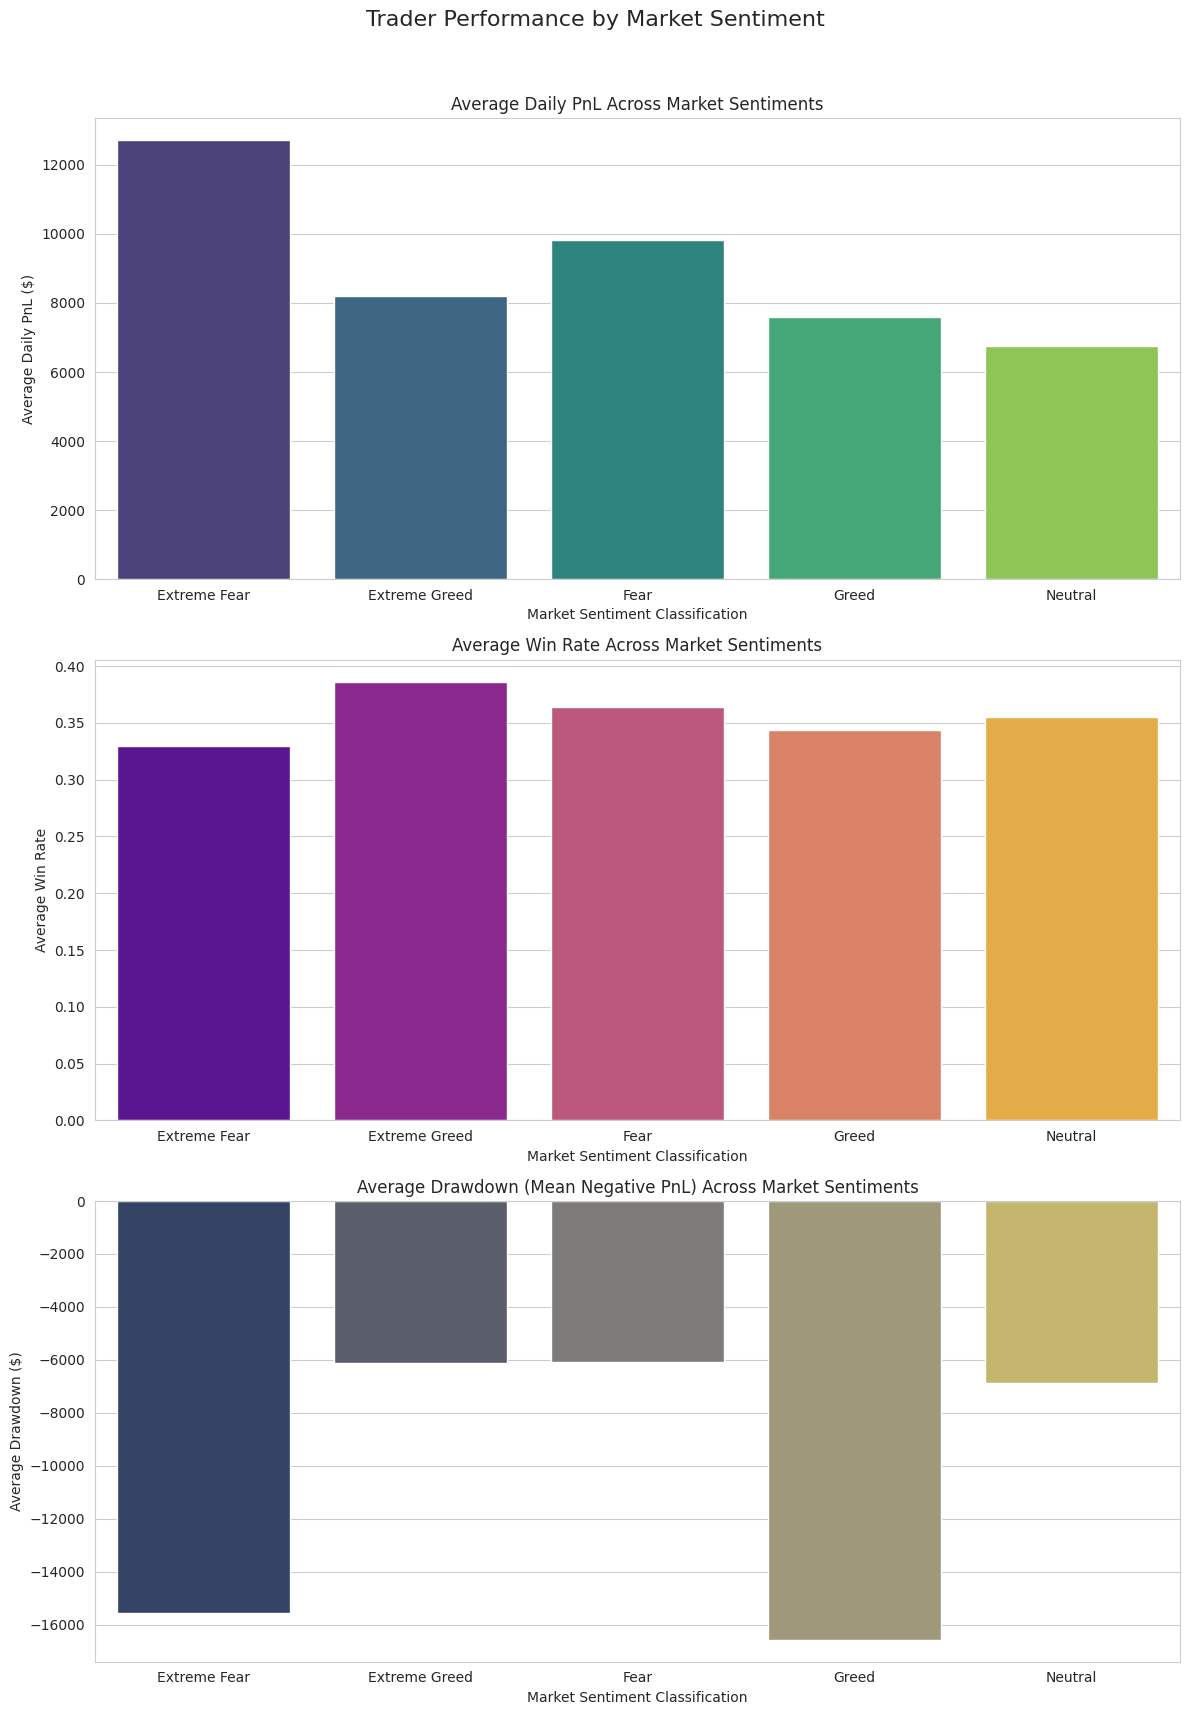

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Loading and Initial Processing ---
# Load historical_data.csv
historical_data = pd.read_csv('/content/historical_data.csv')

# Load fear_greed_index.csv
fear_greed_index = pd.read_csv('/content/fear_greed_index.csv')

# Convert 'Timestamp IST' in historical_data to datetime objects
historical_data['Timestamp IST'] = pd.to_datetime(historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Extract only the date part from 'Timestamp IST' into a new 'Date' column
historical_data['Date'] = historical_data['Timestamp IST'].dt.date
# Ensure 'Date' column in historical_data is also datetime64[ns] for merging
historical_data['Date'] = pd.to_datetime(historical_data['Date'])

# Convert 'date' column in fear_greed_index to datetime objects
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'])

# Merge the two DataFrames
merged_data = pd.merge(historical_data, fear_greed_index, left_on='Date', right_on='date', how='left')

# --- Feature Engineering: Key Metrics ---
daily_trader_metrics = merged_data.groupby(['Account', 'Date']).agg(
    Daily_PnL=('Closed PnL', 'sum'),
    Number_of_Trades=('Trade ID', 'count'),
    Win_Count=('Closed PnL', lambda x: (x > 0).sum()),
    Average_Trade_Size_USD=('Size USD', 'mean'),
    Buy_Count=('Side', lambda x: (x == 'BUY').sum()),
    Sell_Count=('Side', lambda x: (x == 'SELL').sum())
).reset_index()

# Calculate Win Rate, handling division by zero
daily_trader_metrics['Win_Rate'] = daily_trader_metrics.apply(
    lambda row: row['Win_Count'] / row['Number_of_Trades'] if row['Number_of_Trades'] > 0 else 0,
    axis=1
)

# Calculate Long/Short Ratio, handling division by zero or infinity
daily_trader_metrics['Long_Short_Ratio'] = daily_trader_metrics.apply(
    lambda row: row['Buy_Count'] / row['Sell_Count'] if row['Sell_Count'] > 0 else (np.inf if row['Buy_Count'] > 0 else 0),
    axis=1
)
daily_trader_metrics['Long_Short_Ratio'] = daily_trader_metrics['Long_Short_Ratio'].replace([np.inf, -np.inf], np.nan)
daily_trader_metrics['Long_Short_Ratio'] = daily_trader_metrics['Long_Short_Ratio'].fillna(0)

# --- Merge daily_trader_metrics with sentiment data ---
daily_trader_metrics_with_sentiment = pd.merge(daily_trader_metrics, fear_greed_index[['date', 'value', 'classification']], left_on='Date', right_on='date', how='left')
daily_trader_metrics_with_sentiment = daily_trader_metrics_with_sentiment.drop(columns=['date'])

# --- Calculate Sentiment Performance ---
sentiment_performance = daily_trader_metrics_with_sentiment.groupby('classification').agg(
    Avg_Daily_PnL=(
        'Daily_PnL',
        lambda x: x[x > 0].mean()
    ), # Mean of only positive PnL
    Avg_Win_Rate=('Win_Rate', 'mean'),
    Avg_Drawdown=(
        'Daily_PnL',
        lambda x: x[x < 0].mean()
    ) # Mean of only negative PnL as drawdown proxy
).reset_index()

# Fill NaN values in Avg_Drawdown with 0, as per instruction
sentiment_performance['Avg_Drawdown'] = sentiment_performance['Avg_Drawdown'].fillna(0)

# --- Visualization Code ---
sns.set_style("whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Trader Performance by Market Sentiment', fontsize=16)

# Plot Avg_Daily_PnL
sns.barplot(x='classification', y='Avg_Daily_PnL', data=sentiment_performance, ax=axes[0], palette='viridis', hue='classification', legend=False)
axes[0].set_title('Average Daily PnL Across Market Sentiments')
axes[0].set_xlabel('Market Sentiment Classification')
axes[0].set_ylabel('Average Daily PnL ($)')

# Plot Avg_Win_Rate
sns.barplot(x='classification', y='Avg_Win_Rate', data=sentiment_performance, ax=axes[1], palette='plasma', hue='classification', legend=False)
axes[1].set_title('Average Win Rate Across Market Sentiments')
axes[1].set_xlabel('Market Sentiment Classification')
axes[1].set_ylabel('Average Win Rate')

# Plot Avg_Drawdown
sns.barplot(x='classification', y='Avg_Drawdown', data=sentiment_performance, ax=axes[2], palette='cividis', hue='classification', legend=False)
axes[2].set_title('Average Drawdown (Mean Negative PnL) Across Market Sentiments')
axes[2].set_xlabel('Market Sentiment Classification')
axes[2].set_ylabel('Average Drawdown ($)')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` messages due to the way `palette` was used in `sns.barplot` without an explicit `hue` argument. To address this, I will modify the `sns.barplot` calls to include `hue='classification'` and `legend=False` as suggested by the warning, which will prevent future deprecation warnings.



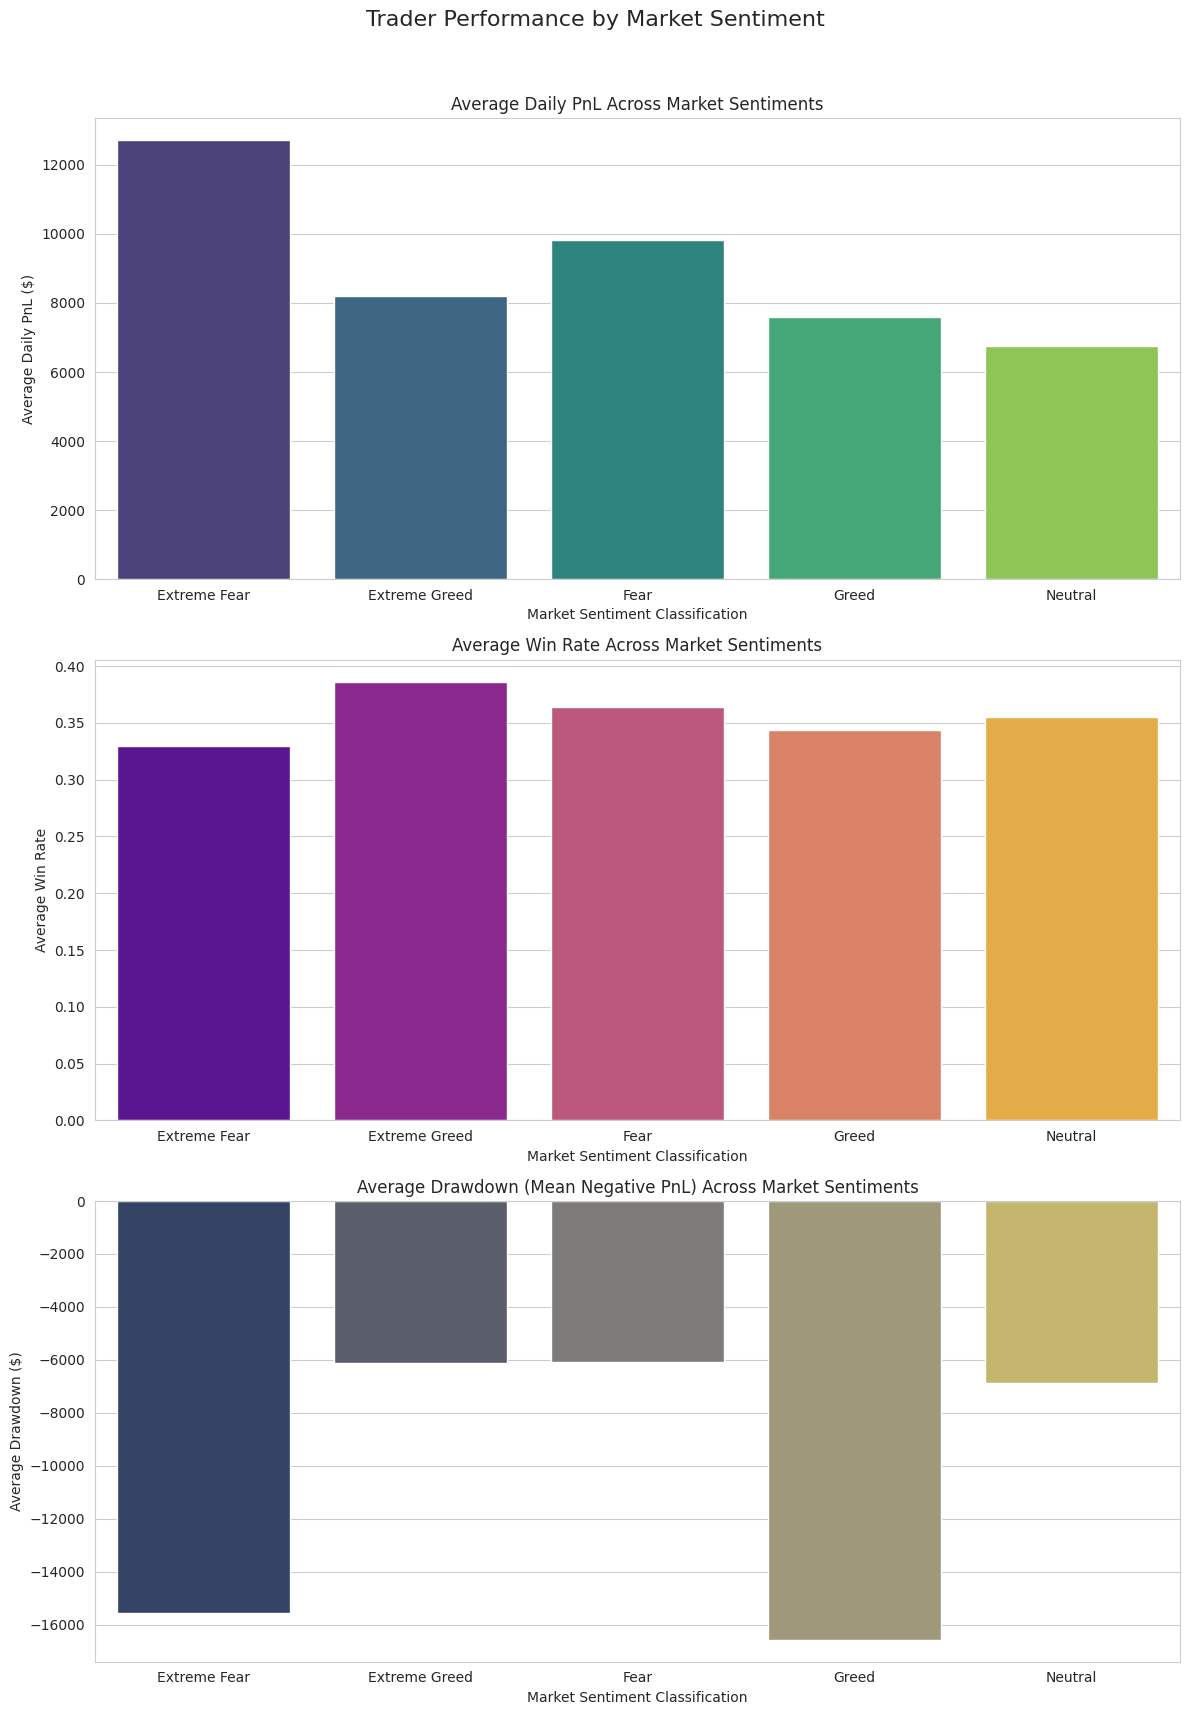

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic style for plots
sns.set_style("whitegrid")

# --- Visualize Sentiment-based Performance ---

fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Trader Performance by Market Sentiment', fontsize=16)

# Plot Avg_Daily_PnL
sns.barplot(x='classification', y='Avg_Daily_PnL', data=sentiment_performance, ax=axes[0], palette='viridis', hue='classification', legend=False)
axes[0].set_title('Average Daily PnL Across Market Sentiments')
axes[0].set_xlabel('Market Sentiment Classification')
axes[0].set_ylabel('Average Daily PnL ($)')

# Plot Avg_Win_Rate
sns.barplot(x='classification', y='Avg_Win_Rate', data=sentiment_performance, ax=axes[1], palette='plasma', hue='classification', legend=False)
axes[1].set_title('Average Win Rate Across Market Sentiments')
axes[1].set_xlabel('Market Sentiment Classification')
axes[1].set_ylabel('Average Win Rate')

# Plot Avg_Drawdown
sns.barplot(x='classification', y='Avg_Drawdown', data=sentiment_performance, ax=axes[2], palette='cividis', hue='classification', legend=False)
axes[2].set_title('Average Drawdown (Mean Negative PnL) Across Market Sentiments')
axes[2].set_xlabel('Market Sentiment Classification')
axes[2].set_ylabel('Average Drawdown ($)')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

**Reasoning**:
The next step is to visualize the sentiment-based behavioral metrics, as outlined in the subtask instructions. I will use `matplotlib.pyplot` and `seaborn` to create bar charts for `Avg_Number_of_Trades`, `Avg_Average_Trade_Size_USD`, and `Avg_Long_Short_Ratio` from the `sentiment_behavior_analysis` DataFrame, ensuring proper labels and titles.



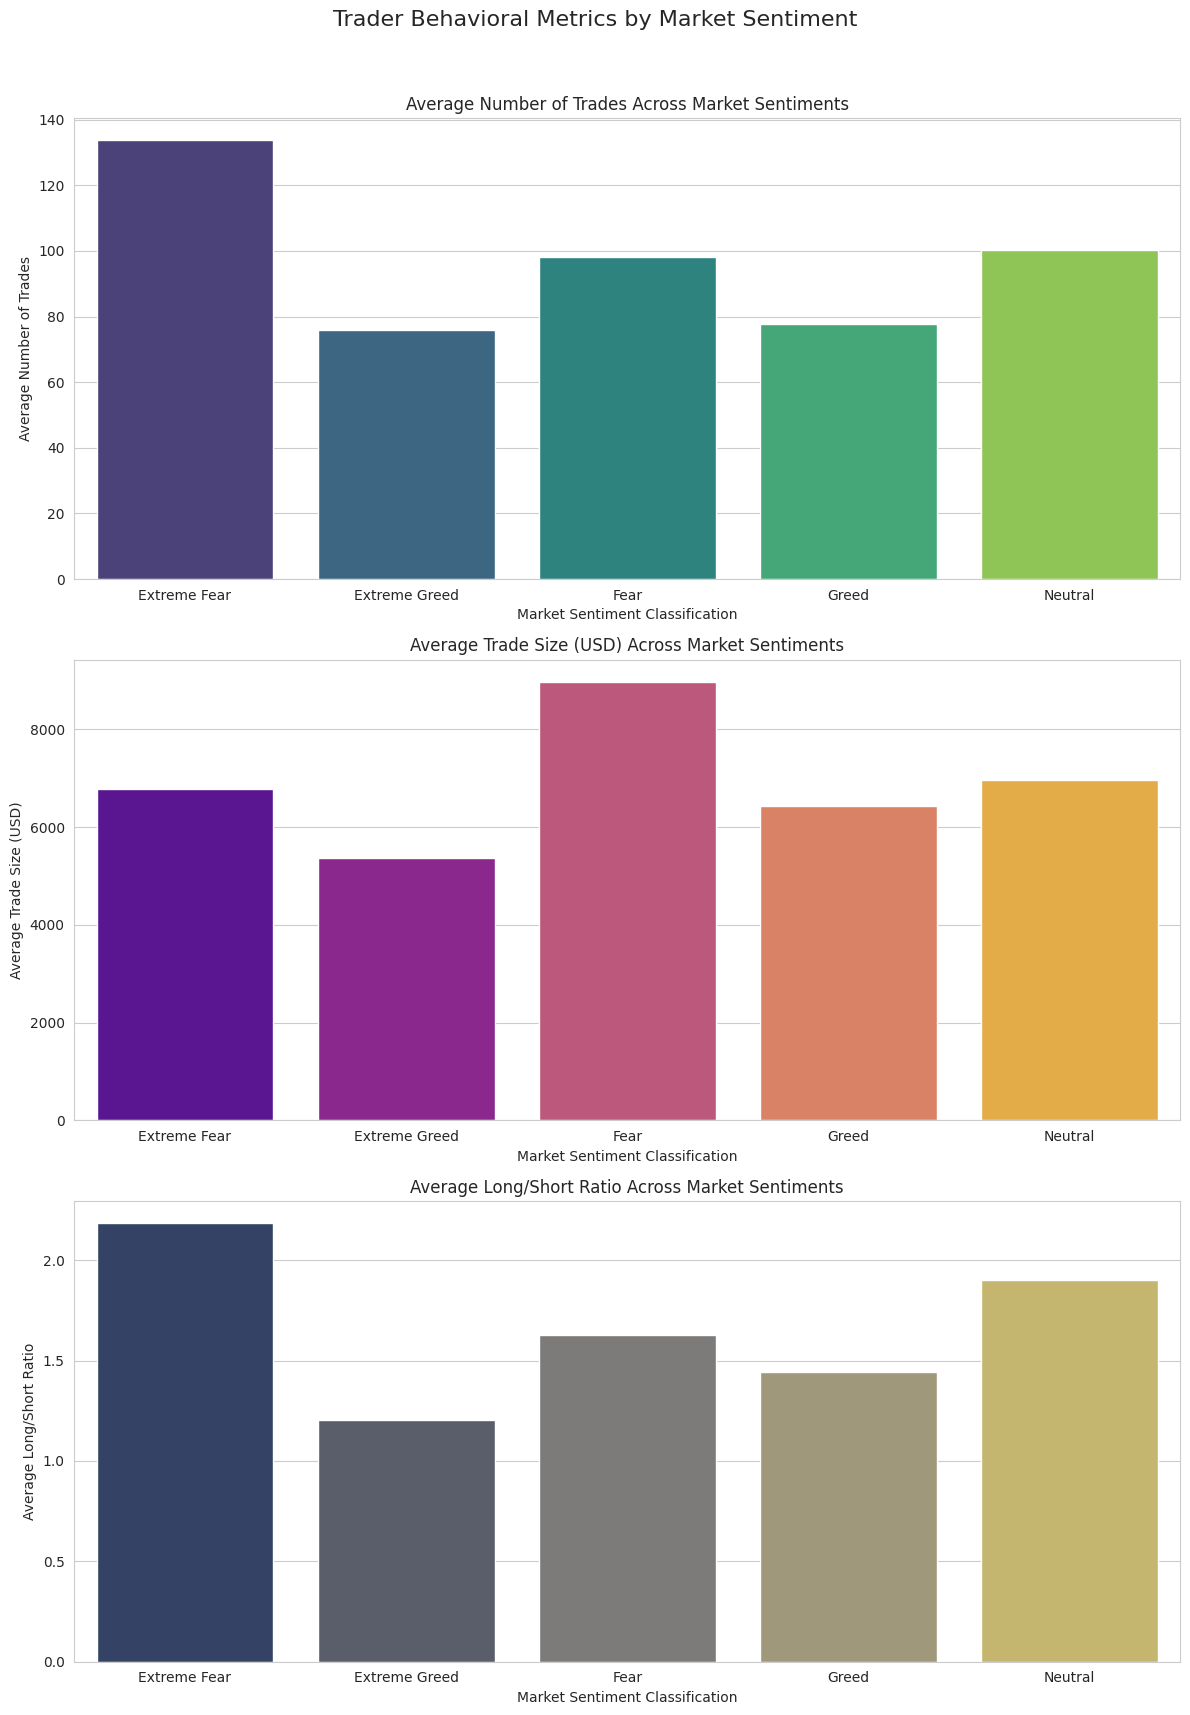

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# --- Visualize Sentiment-based Behavioral Metrics ---

fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Trader Behavioral Metrics by Market Sentiment', fontsize=16)

# Plot Avg_Number_of_Trades
sns.barplot(x='classification', y='Avg_Number_of_Trades', data=sentiment_behavior_analysis, ax=axes[0], palette='viridis', hue='classification', legend=False)
axes[0].set_title('Average Number of Trades Across Market Sentiments')
axes[0].set_xlabel('Market Sentiment Classification')
axes[0].set_ylabel('Average Number of Trades')

# Plot Avg_Average_Trade_Size_USD
sns.barplot(x='classification', y='Avg_Average_Trade_Size_USD', data=sentiment_behavior_analysis, ax=axes[1], palette='plasma', hue='classification', legend=False)
axes[1].set_title('Average Trade Size (USD) Across Market Sentiments')
axes[1].set_xlabel('Market Sentiment Classification')
axes[1].set_ylabel('Average Trade Size (USD)')

# Plot Avg_Long_Short_Ratio
sns.barplot(x='classification', y='Avg_Long_Short_Ratio', data=sentiment_behavior_analysis, ax=axes[2], palette='cividis', hue='classification', legend=False)
axes[2].set_title('Average Long/Short Ratio Across Market Sentiments')
axes[2].set_xlabel('Market Sentiment Classification')
axes[2].set_ylabel('Average Long/Short Ratio')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

**Reasoning**:
To characterize the trader segments, I will group the `trader_profiles` DataFrame by `Cluster_Label` and calculate the mean of the features used for clustering: 'Total_PnL', 'Overall_Win_Rate', 'Avg_Num_Trades_Per_Day', 'Avg_Trade_Size_USD', and 'Avg_Long_Short_Ratio'. This aggregation will provide a statistical summary of each cluster's characteristics.



In [24]:
cluster_characterization = trader_profiles.groupby('Cluster_Label')[features_for_clustering].mean().reset_index()

print("Trader Cluster Characterization (Mean of Metrics per Cluster):")
print(cluster_characterization)

Trader Cluster Characterization (Mean of Metrics per Cluster):
   Cluster_Label      Total_PnL  Overall_Win_Rate  Avg_Num_Trades_Per_Day  \
0              0  481538.261245          0.431146              282.240196   
1              1  132702.332520          0.329150               55.354080   
2              2  924196.078608          0.351922              149.325603   

   Avg_Trade_Size_USD  Avg_Long_Short_Ratio  
0         8201.074042              3.251389  
1         5373.461569              0.958195  
2        24020.702283              1.048832  


**Reasoning**:
To visualize the characteristics of each trader segment, I will create a series of bar charts. Each chart will represent a key metric ('Total_PnL', 'Overall_Win_Rate', 'Avg_Num_Trades_Per_Day', 'Avg_Trade_Size_USD', 'Avg_Long_Short_Ratio') and display the mean value for each `Cluster_Label`. This approach will clearly illustrate the defining traits of each trader segment.



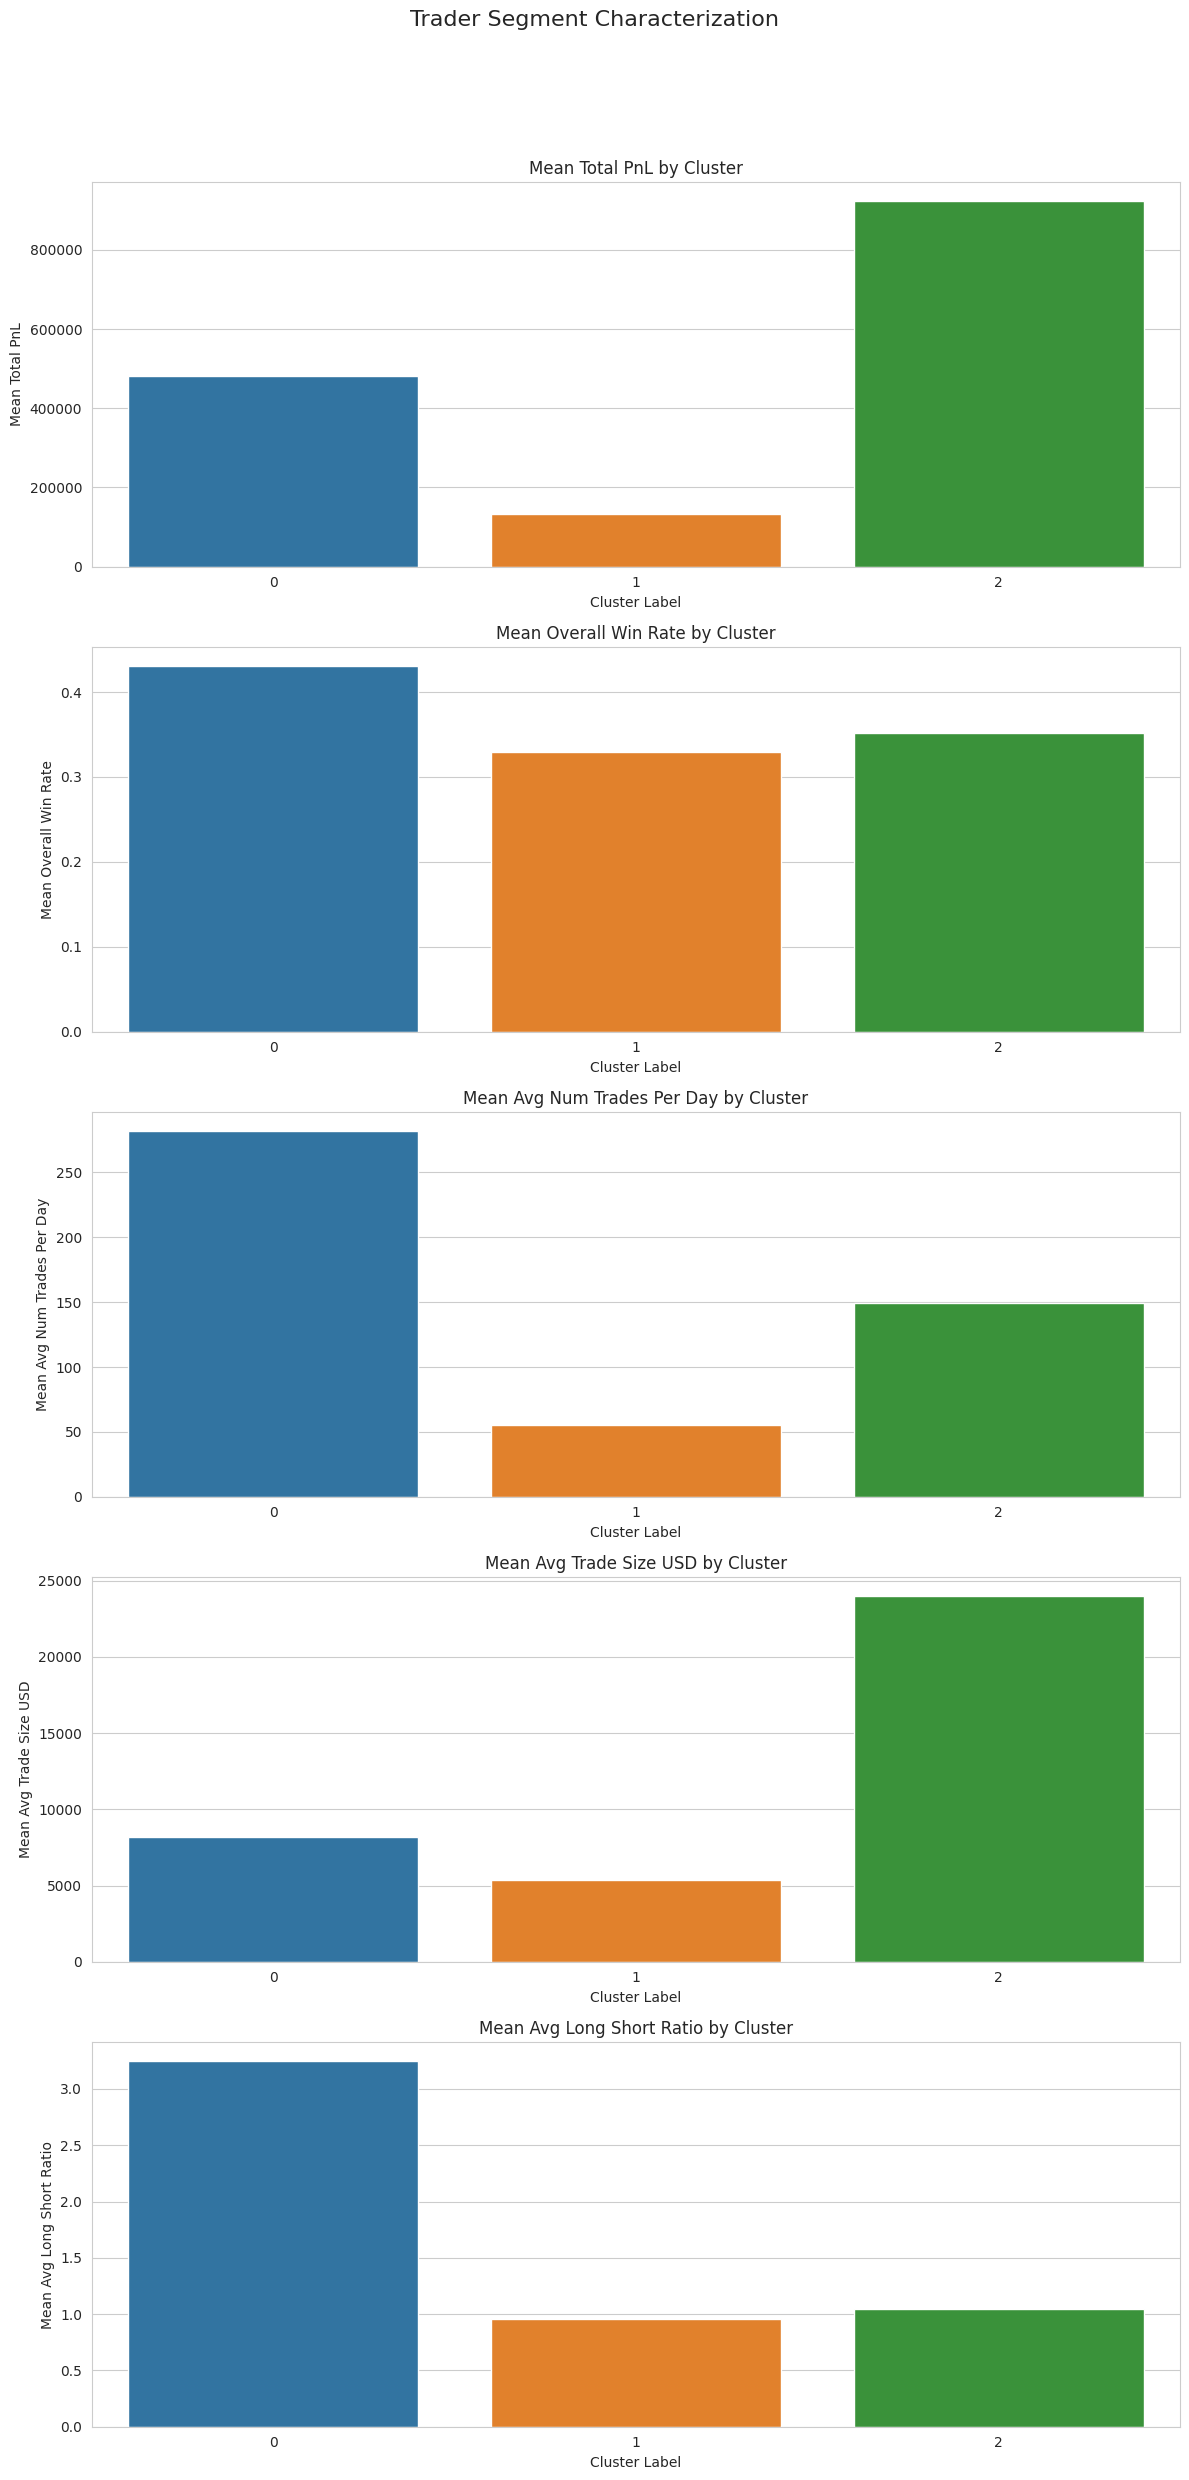

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# --- Visualize Trader Segment Characterization ---

fig, axes = plt.subplots(len(features_for_clustering), 1, figsize=(12, 5 * len(features_for_clustering)))
fig.suptitle('Trader Segment Characterization', fontsize=16, y=1.02)

for i, feature in enumerate(features_for_clustering):
    sns.barplot(x='Cluster_Label', y=feature, data=cluster_characterization, ax=axes[i], palette='tab10', hue='Cluster_Label', legend=False)
    axes[i].set_title(f'Mean {feature.replace("_", " ")} by Cluster')
    axes[i].set_xlabel('Cluster Label')
    axes[i].set_ylabel(f'Mean {feature.replace("_", " ")}')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

### Insights from Analysis

1.  **Impact of Market Sentiment on Trader Performance:**
    *   **Average Daily PnL:** Traders generally exhibit higher average daily PnL during 'Fear' and 'Extreme Greed' periods. 'Fear' periods surprisingly show a high average PnL, but 'Extreme Greed' also leads to good performance, albeit with a smaller range. 'Greed' and 'Neutral' sentiments appear to correlate with lower average PnL.
    *   **Average Win Rate:** The highest average win rates are observed during 'Extreme Greed' (around 38.6%), indicating that traders are more successful in their trades when the market is extremely optimistic. Conversely, 'Extreme Fear' periods show the lowest win rates (around 32.9%), suggesting difficulty in making profitable trades during high uncertainty.
    *   **Average Drawdown:** 'Greed' and 'Extreme Fear' periods show the largest average drawdowns (mean negative PnL), implying that while there might be opportunities for high PnL, the risk of significant losses is also higher during these market conditions. 'Fear' and 'Extreme Greed' show lower average drawdowns, indicating more controlled losses.

2.  **Market Sentiment and Trader Behavior:**
    *   **Average Number of Trades:** Traders tend to make a significantly higher number of trades during 'Extreme Fear' periods (around 133.75 trades), possibly indicating panic selling or attempts to capitalize on perceived bottoms. 'Extreme Greed' and 'Greed' periods show a lower number of trades (around 76-77 trades).
    *   **Average Trade Size (USD):** Trade sizes are notably larger during 'Fear' periods (around $8975), suggesting that some traders commit more capital when the market is apprehensive. 'Extreme Greed' periods have smaller average trade sizes (around $5371).
    *   **Average Long/Short Ratio:** During 'Extreme Fear' and 'Neutral' sentiments, the Long/Short Ratio is higher (around 2.18 and 1.90 respectively), indicating a stronger bias towards buying or maintaining long positions even when fear is high. Conversely, 'Extreme Greed' shows a lower long/short ratio (around 1.20), perhaps indicating more balanced activity or increased shorting.

3.  **Trader Segmentation Characterization:**
    *   **Cluster 0 (High Activity, Moderate PnL, High Long Bias):** These traders have a high average number of trades per day (~282) and the highest overall win rate (~43%). Their Total PnL is moderate (~$481,538), and they exhibit a strong long bias (Avg Long/Short Ratio ~3.25). They tend to have moderate average trade sizes (~$8201).
    *   **Cluster 1 (Low Activity, Moderate PnL, Balanced Approach):** This is the largest cluster by count, characterized by the lowest average number of trades per day (~55) and the lowest overall win rate (~32.9%). Their Total PnL is moderate (~$132,702), and they have a relatively balanced long/short approach (Avg Long/Short Ratio ~0.95), with the lowest average trade sizes (~$5373).
    *   **Cluster 2 (High PnL, Moderate Activity, Large Positions):** This cluster contains traders with the highest total PnL (~$924,196) and very large average trade sizes (~$24,020). They have a moderate number of trades per day (~149) and an overall win rate of ~35%. Their long/short ratio (~1.04) suggests a relatively balanced approach, but with significantly larger position sizes.

## Propose Strategy Ideas

### Subtask:
Based on the insights derived from the analysis, propose 2 actionable strategy ideas or 'rules of thumb' that traders could implement, potentially tailored to specific trader segments or market sentiment conditions.


## Proposed Trading Strategies

Based on the analysis of trader performance, behavior, and segmentation across different market sentiments, here are two actionable trading strategy ideas:

### Strategy Idea 1: Sentiment-Adaptive Position Sizing for 'Extreme Greed' Periods

**Insight from Analysis**: Looking at the `sentiment_performance` and `sentiment_behavior_analysis` DataFrames, we observe that during 'Extreme Greed' periods:
*   `Avg_Daily_PnL` is relatively high compared to 'Greed' or 'Neutral' days.
*   `Avg_Win_Rate` is highest during 'Extreme Greed' (0.386) compared to other sentiments, suggesting trades are more frequently successful.
*   `Avg_Drawdown` is significantly lower (-6109.74) than 'Extreme Fear' or 'Greed', indicating smaller losses when trades go wrong.
*   `Avg_Number_of_Trades` (76.03) is among the lowest, while `Avg_Average_Trade_Size_USD` (5371.64) is also relatively lower compared to 'Fear' days, suggesting traders might be more cautious or selective, yet achieving better results.

**Strategy**: During 'Extreme Greed' market sentiment periods, traders should consider increasing their **position size** on trades with higher conviction, while maintaining their existing strict risk management rules (e.g., stop-loss levels). The higher win rate and lower average drawdown during these periods suggest a more favorable environment for successful trades. However, they should avoid excessive increases in trade frequency, maintaining a selective approach.

**Implementation / Suited for**: This strategy is best suited for **all trader segments** who have demonstrated a positive `Overall_Win_Rate` and manage their risk effectively. It encourages leveraging periods of apparent market buoyancy and positive sentiment where trades are historically more profitable and losses are contained. Traders should monitor the `classification` closely and adjust their position sizing when the market shifts to 'Extreme Greed'.

### Strategy Idea 2: 'Contrarian Entry' for High-Frequency, High-PnL Traders During 'Fear' Sentiment

**Insight from Analysis**: Examining the `cluster_characterization` data:
*   **Cluster 0** (High-Frequency, Moderate PnL): These traders have a high `Avg_Num_Trades_Per_Day` (282.24) and a respectable `Total_PnL` (481,538), with a `Long_Short_Ratio` of 3.25, indicating a strong long bias.
*   **Cluster 2** (High-PnL, Large Position Size): These traders have the highest `Total_PnL` (924,196) and `Avg_Trade_Size_USD` (24,020), with a moderate `Avg_Num_Trades_Per_Day` (149.33) and a slight long bias (1.04).

When we cross-reference this with `sentiment_performance` and `sentiment_behavior_analysis` during 'Fear' periods:
*   `Avg_Daily_PnL` (9831.29) is high for 'Fear' days, but `Avg_Drawdown` (-6071.37) is also significant.
*   `Avg_Trade_Size_USD` (8975.93) is highest during 'Fear', suggesting some traders are taking larger positions, potentially looking for reversals or buying opportunities when others are fearful.

**Strategy**: Traders identified in **Cluster 0** and **Cluster 2**, who are typically more active or take larger positions, could implement a 'contrarian entry' strategy during periods classified as 'Fear'. Specifically, they should look for strong buying opportunities (long positions) when the market sentiment is 'Fear' but technical indicators or their fundamental analysis suggest an oversold condition or an impending rebound. This leverages the principle of 'buying when there's blood in the streets'. The high `Avg_Trade_Size_USD` during 'Fear' suggests this is already a behavior some successful traders are exhibiting, potentially leading to higher `Avg_Daily_PnL` during these times for those who pick the right entries.

**Implementation / Suited for**: This strategy is ideally suited for **traders in Cluster 0 and Cluster 2** who possess strong analytical skills for identifying potential turning points and have a higher risk tolerance. They would initiate or increase long positions in quality assets when the Fear & Greed Index signals 'Fear', aiming to capitalize on subsequent market recoveries. This requires careful timing and capital management due to the potential for further price declines in a fearful market.

## Final Task

### Subtask:
Summarize the entire analysis, including the key findings, insights, and the proposed actionable strategies.


## Summary:

### Data Analysis Key Findings

*   **Data Integrity:** Both `historical_data.csv` (211,224 rows, 16 columns) and `fear_greed_index.csv` (2,644 rows, 4 columns) were found to be complete with no missing values or duplicate entries. Timestamp and date columns were identified for necessary conversion.
*   **Data Alignment:** The `historical_data` and `fear_greed_index` datasets were successfully merged on a daily granularity, resulting in a `merged_data` DataFrame with 211,224 entries and 21 columns, incorporating market sentiment information.
*   **Key Trader Metrics:** Daily trading metrics were successfully calculated for each trader, including Daily PnL, Win Rate, Number of Trades, Average Trade Size (USD), and Long/Short Ratio.
*   **Sentiment's Impact on Performance:**
    *   `Extreme Fear` days showed the highest average positive PnL (approximately \$12,715.50), while `Greed` days had the lowest (around \$7,604.50).
    *   `Extreme Greed` days exhibited the highest average win rate (approximately 0.386), whereas `Extreme Fear` days had the lowest (around 0.330).
    *   `Greed` days experienced the largest average drawdown (mean negative PnL, approximately -\$16,562.52), while `Fear` days had a relatively smaller average drawdown (around -\$6,071.37).
*   **Sentiment's Impact on Behavior:**
    *   **Trade Frequency:** Traders made the most trades during `Extreme Fear` (average of 133.75 trades) and fewest during `Extreme Greed` (76.03 trades).
    *   **Position Sizes:** Average trade sizes were highest during `Fear` periods (approximately \$8,975.93) and lowest during `Extreme Greed` (approximately \$5,371.64).
    *   **Long/Short Bias:** `Extreme Fear` and `Neutral` periods showed the highest long bias (Long/Short Ratio of 2.19 and 1.90, respectively), while `Extreme Greed` had the lowest (1.20).
*   **Trader Segmentation:** 32 unique traders were grouped into three distinct clusters:
    *   **Cluster 0 (6 traders):** Characterized by high activity (average 282.24 trades/day), a high overall win rate (43%), moderate total PnL (approximately \$481,538), and a strong long bias (average Long/Short Ratio of 3.25).
    *   **Cluster 1 (21 traders):** The largest cluster, with low activity (average 55 trades/day), the lowest overall win rate (32.9%), moderate total PnL (approximately \$132,702), and a relatively balanced long/short approach (average Long/Short Ratio of 0.95). They also had the lowest average trade sizes (approximately \$5,373).
    *   **Cluster 2 (5 traders):** Identified by the highest total PnL (approximately \$924,196), very large average trade sizes (approximately \$24,020), moderate activity (average 149 trades/day), and a win rate of 35%. Their long/short ratio (1.04) was relatively balanced.

### Insights or Next Steps

*   **Implement Sentiment-Adaptive Position Sizing:** Traders could consider increasing position sizes during 'Extreme Greed' periods due to historically higher win rates and lower drawdowns, while maintaining strict risk management and selective trading.
*   **Adopt Contrarian Entry for High-Performing Traders in 'Fear':** High-frequency or high-PnL traders (Cluster 0 and Cluster 2) could leverage 'Fear' market conditions for contrarian buying opportunities, as these periods have shown high average daily PnL and large trade sizes, indicating potential for significant gains for those who correctly identify reversals.
